<a href="https://colab.research.google.com/github/sathwika2005/ML_Project/blob/main/Student_Performance_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Multiple, Polynomial And Logistic Regression

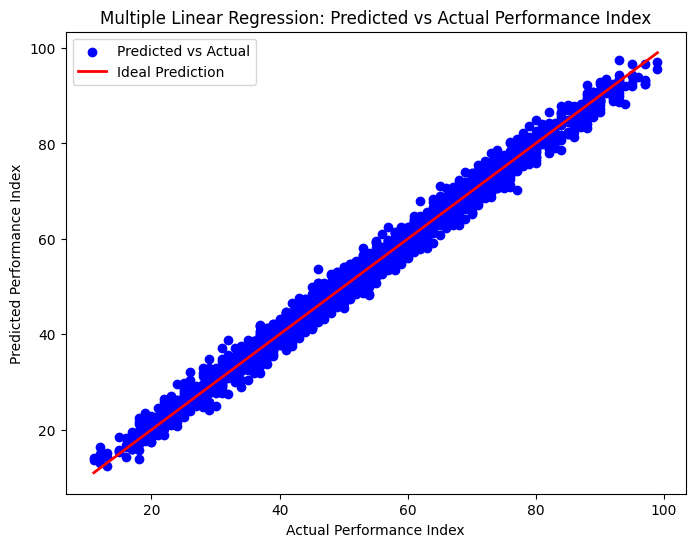

Multiple Linear Regression - MSE: 4.082628398521853, R-squared: 0.9889832909573145


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Student_Performance.csv'  # Change this to your file path
data = pd.read_csv(file_path)

# Identify categorical columns and convert them to numerical values using LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is categorical
        data[column] = label_encoder.fit_transform(data[column])

# Split the dataset into features and target variable
X = data.drop('Performance Index', axis=1)  # Independent variables
y = data['Performance Index']               # Dependent variable

# Splitting the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Multiple Linear Regression ---
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Plot the predicted vs actual values for Multiple Linear Regression
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Multiple Linear Regression: Predicted vs Actual Performance Index')
plt.legend()
plt.show()

# Print model evaluation metrics
print(f'Multiple Linear Regression - MSE: {mse_linear}, R-squared: {r2_linear}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


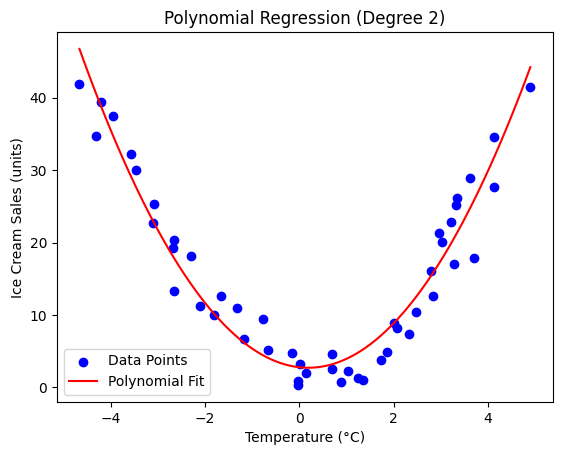

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/Ice_cream selling data.csv'
data = pd.read_csv(file_path)

# Separate the features and target variable
X = data[['Temperature (°C)']]
y = data['Ice Cream Sales (units)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2 for polynomial regression)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Visualize the results
# Generate a smooth curve for the polynomial fit
X_range = np.linspace(X.min(), X.max(), 100)  # 100 points between min and max temperature
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot the original data and the polynomial regression fit
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()


Accuracy: 0.9
Confusion Matrix: 
[[65  3]
 [ 7 25]]


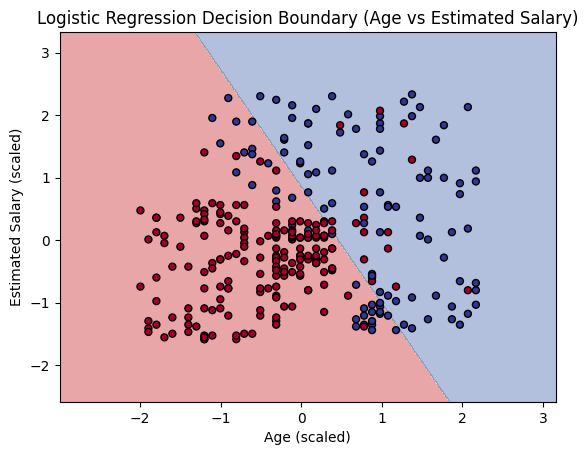

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Social_Network_Ads.csv')

# Preprocessing
data = data.drop('User ID', axis=1)
labelencoder = LabelEncoder()
data['Gender'] = labelencoder.fit_transform(data['Gender'])

# Splitting the dataset
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Prediction and evaluation
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")

# 2D Plotting (using only 'Age' and 'EstimatedSalary')
X_train_2d = X_train[['Age', 'EstimatedSalary']]
X_test_2d = X_test[['Age', 'EstimatedSalary']]

# Scaling for 2D data
X_train_2d_scaled = scaler.fit_transform(X_train_2d)
X_test_2d_scaled = scaler.transform(X_test_2d)

# Logistic regression on 2D data
log_reg_2d = LogisticRegression()
log_reg_2d.fit(X_train_2d_scaled, y_train)

# Create a meshgrid for decision boundary
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid
Z = log_reg_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train, marker='o', s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("Logistic Regression Decision Boundary (Age vs Estimated Salary)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.show()
